In [1]:
from packaging import version
import sklearn

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [5]:
X, y = mnist.data, mnist.target

In [6]:
X.shape, y.shape

((70000, 784), (70000,))

In [7]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

In [8]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [9]:
X_train.shape

(60000, 784)

In [10]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

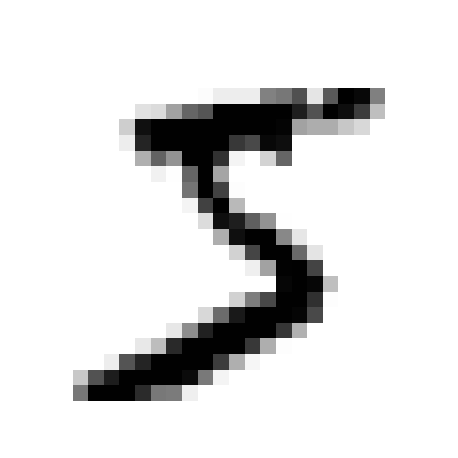

In [13]:
some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [16]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [17]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [18]:
from sklearn.model_selection import cross_val_predict

In [19]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
y_train_predict

array([ True, False, False, ...,  True, False, False])

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_predict)

In [22]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [24]:
precision_score(y_train_5, y_train_predict), recall_score(y_train_5, y_train_predict)

(0.8370879772350012, 0.6511713705958311)

In [25]:
f1_score(y_train_5, y_train_predict)

0.7325171197343847

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [27]:
treshold = 0
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

array([ True])

In [28]:
treshold = 3000
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

array([False])

In [29]:
threshold = 0

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [33]:
threshold = 3000

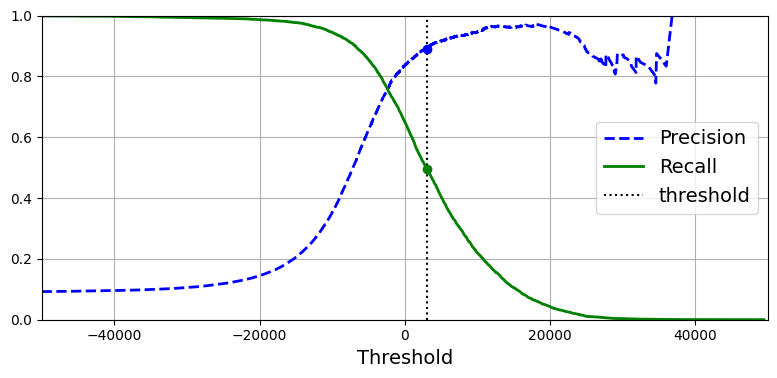

In [34]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

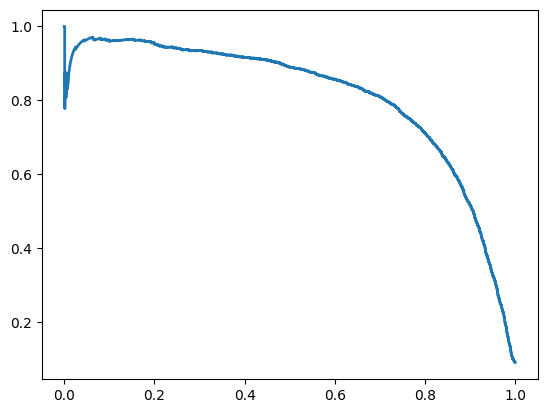

In [35]:
plt.plot(recalls, precisions, linewidth=2, label='precision/recall curve')

In [36]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [37]:
from sklearn.metrics import roc_curve

In [38]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [40]:
idx_for_treshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_treshold_at_90], fpr[idx_for_treshold_at_90]

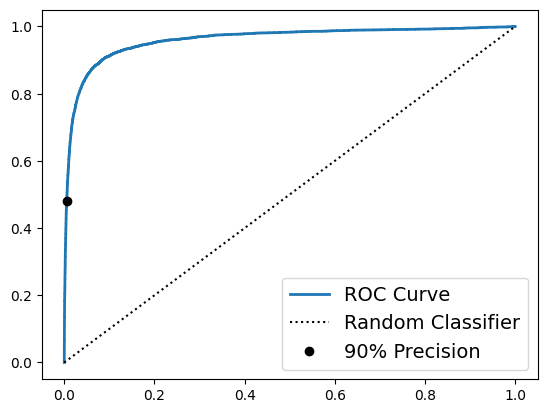

In [49]:
plt.plot(fpr, tpr, linewidth=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k:', label='Random Classifier')
plt.plot([fpr_90], tpr_90, 'ko', label='90% Precision')
plt.legend(loc='lower right')
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [52]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [53]:
y_probab_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [54]:
y_probab_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [55]:
y_scores_forest = y_probab_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

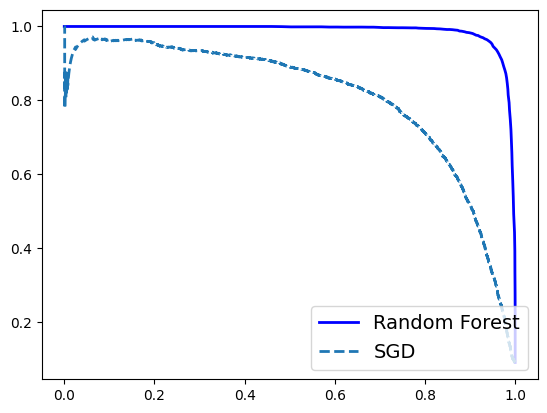

In [58]:
plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2, label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')
plt.legend(loc='lower right')
plt.show()

In [60]:
y_pred_forest = y_probab_forest[:, 1] >= 0.5
f1_score(y_train_5, y_pred_forest), precision_score(y_train_5, y_pred_forest), recall_score(y_train_5, y_pred_forest)

(0.9274509803921569, 0.9897468089558485, 0.8725327430363402)

In [64]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)